In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam

from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.utils import plot_model
from keras.callbacks import TensorBoard

from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

169844736/170498071 [============================>.] - ETA: 0s

In [3]:
import matplotlib.pyplot as plt

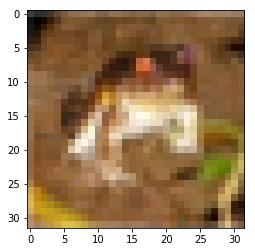

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [8]:
y_train[0]

array([6], dtype=uint8)

In [5]:
# floatに型変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 各画素値を正規化
X_train /= 255.0
X_test /= 255.0

In [7]:
nb_classes = 10 

In [9]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
# モデルの定義
model = Sequential()

model.add(Conv2D(32,3,input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(1.0))

model.add(Dense(nb_classes, activation='softmax'))

adam = Adam(lr=1e-4)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [11]:
history = model.fit(X_train, Y_train, batch_size=100, epoch=100, verbose=1, validation_split=0.3)

C:\Users\duan_xiaocheng\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 226s - loss: 1.8376 - acc: 0.3474 - val_loss: 1.5896 - val_acc: 0.4379
Epoch 2/100
35000/35000 [==============================] - 229s - loss: 1.4621 - acc: 0.4807 - val_loss: 1.4181 - val_acc: 0.4972
Epoch 3/100
35000/35000 [==============================] - 234s - loss: 1.3340 - acc: 0.5286 - val_loss: 1.3165 - val_acc: 0.5381
Epoch 4/100
 2300/35000 [>.............................] - ETA: 185s - loss: 1.2727 - acc: 0.5504

KeyboardInterrupt: 